### Read Data

In [1]:
import pandas as pd
import os
import re

files = [*(os.scandir('csvs_plus'))]
csv_list = []
reg = r'(\d*)_data.csv'

data_dict = {}
for f in files:
    station = re.findall(reg, f.name)[0]
    data_dict[station] = pd.read_csv(f'csvs_plus/{f.name}',
                                     index_col=0,
                                     parse_dates=['날짜'],
                                     infer_datetime_format=True)
    # data_dict[station] = data_dict[station].loc[data_dict[station]['대여량'] > 0]

# 763
df = pd.read_csv('csvs_plus/763_data.csv',
                 index_col=0,
                 parse_dates=['날짜'],
                 infer_datetime_format=True)
df

,날짜,요일,am/pm,시간대,대여량,강수량,기온,풍속
0,2022-07-27,2,0,0,0,0.0,27.6,3.2
1,2022-07-27,2,0,1,0,0.0,27.6,3.2
2,2022-07-27,2,0,2,0,0.0,27.6,3.2
3,2022-07-27,2,0,3,0,0.0,27.6,3.2
4,2022-07-27,2,0,4,0,0.0,27.6,3.2
...,...,...,...,...,...,...,...,...
3787,2022-12-31,5,1,7,1,0.0,-1.1,0.9
3788,2022-12-31,5,1,8,0,0.0,-1.1,0.9
3789,2022-12-31,5,1,9,0,0.0,-1.1,0.9
3790,2022-12-31,5,1,10,0,0.0,-1.1,0.9


/tmp/ipykernel_17940/792577926.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


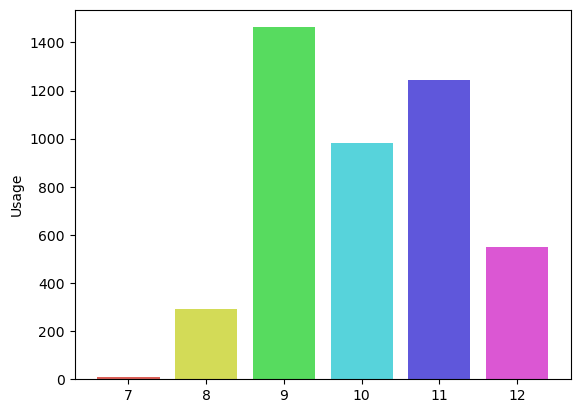

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

color_set = lambda l: sb.color_palette('hls', l)
usage_by_month = np.zeros(13)
x_labels = [f'{i}' for i in range(7, 13)]
# 7월부터 12월까지

for i, r in df.iterrows():
    usage_by_month[int(r['날짜'].month)] += r['대여량']
fig, ax = plt.subplots(1, 1)

x = np.arange(len(usage_by_month[7:]))
ax.bar(x, usage_by_month[7:], color=sb.color_palette('hls', len(x)))
ax.set_xticks(x, x_labels)
ax.set_ylabel('Usage')
fig.show()

/tmp/ipykernel_17940/3880554458.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


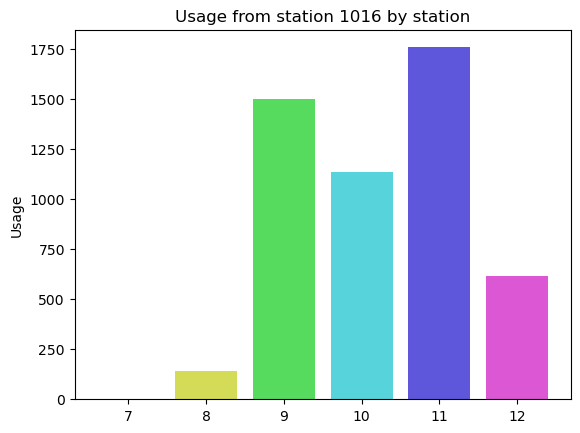

In [23]:
usage_by_month = np.zeros(13)
x_labels = [f'{i}' for i in range(7, 13)]
# 7월부터 12월까지

for i, r in data_dict['1016'].iterrows():
    usage_by_month[int(r['날짜'].month)] += r['대여량']
fig, ax = plt.subplots(1, 1)

x = np.arange(len(usage_by_month[7:]))
ax.bar(x, usage_by_month[7:], color=sb.color_palette('hls', len(x)))
ax.set_xticks(x, x_labels)
ax.set_ylabel('Usage')
ax.set_title('Usage from station 1016 by station')
fig.show()

### Data filter

In [3]:
save = [9, 10, 11]
def save_ds_from_array(l: pd.Series) -> pd.Series:
    c = l.copy()
    for i, v in c.items():
        if v.month in save:
            c[i] = True
        else:
            c[i] = False
    return c
df_new = df.loc[save_ds_from_array(df['날짜'])]
df_new

,날짜,요일,am/pm,시간대,대여량,강수량,기온,풍속
864,2022-09-01,3,0,0,0,0.0,22.4,1.4
865,2022-09-01,3,0,1,0,0.0,22.4,1.4
866,2022-09-01,3,0,2,0,0.0,22.4,1.4
867,2022-09-01,3,0,3,0,0.0,22.4,1.4
868,2022-09-01,3,0,4,1,0.0,22.4,1.4
...,...,...,...,...,...,...,...,...
3043,2022-11-30,2,1,7,0,0.0,-2.9,3.7
3044,2022-11-30,2,1,8,0,0.0,-2.9,3.7
3045,2022-11-30,2,1,9,1,0.0,-2.9,3.7
3046,2022-11-30,2,1,10,1,0.0,-2.9,3.7


/tmp/ipykernel_17940/1329299322.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


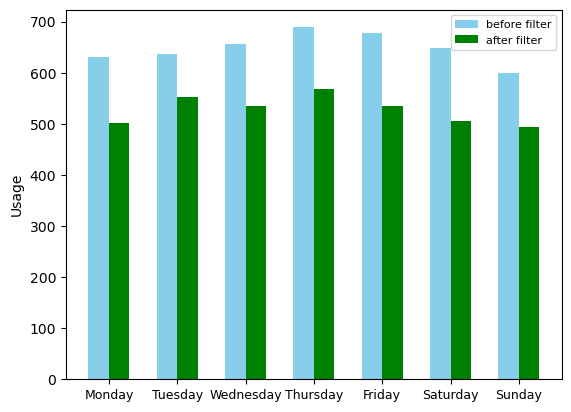

In [4]:
usage_by_day = np.zeros(7)
x_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i, r in df.iterrows():
    usage_by_day[int(r['요일'])] += r['대여량']

fig, ax = plt.subplots(1, 1)

x = np.arange(len(usage_by_day))
ax.bar(x-0.15, usage_by_day, color='skyblue', width=0.3, label='before filter')
ax.set_xticks(x, x_labels, fontsize=9)
ax.set_ylabel('Usage')
# ax.set_title('Before Data filter', fontsize=20)

usage_by_day_2 = np.zeros(7)
for i, r in df_new.iterrows():
    usage_by_day_2[int(r['요일'])] += r['대여량']
ax.bar(x+0.15, usage_by_day_2, color='g', width=0.3, label='after filter')
# ax[1].bar(x, usage_by_day_2, color=color_set(len(usage_by_day_2)), width=0.5)
# ax[1].set_xticks(x, x_labels, fontsize=9)
# ax[1].set_ylabel('Usage')
# ax[1].set_title('After Data filter', fontsize=20)
ax.legend(loc='upper right', fontsize=8)
fig.show()

### Calc standard deviation by station

In [6]:
std_dict = {}
for st, dfs in data_dict.items():
    usg = np.zeros(7)
    for i, r in dfs.iterrows():
        usg[int(r['요일'])] += r['대여량']
    std_dict[st] = np.std(usg)

/tmp/ipykernel_17940/3260203996.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


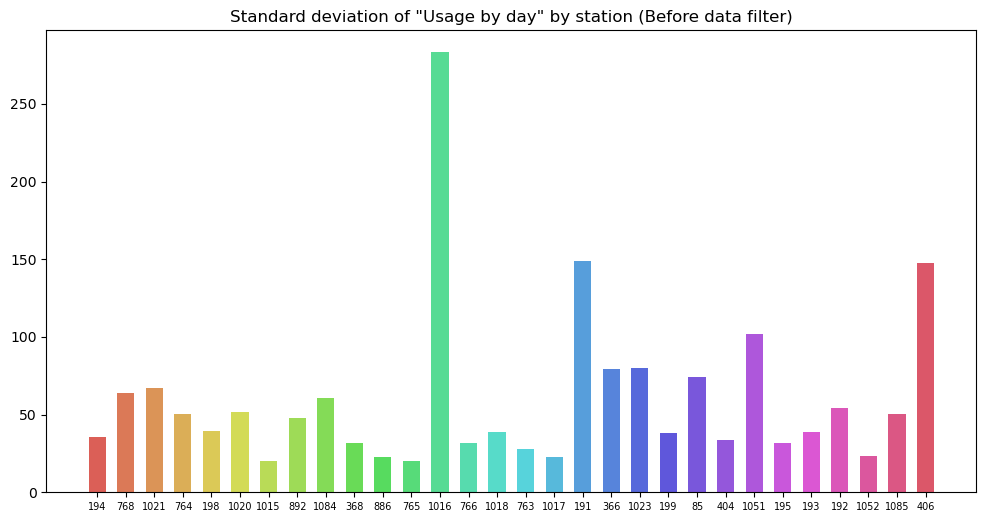

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(std_dict))
ax.bar(x, std_dict.values(), color=color_set(len(x)), width=0.6)
ax.set_xticks(x, std_dict.keys(), fontsize=7)
ax.set_title('Standard deviation of \"Usage by day\" by station (Before data filter)')
fig.show()

In [8]:
save = [9, 10, 11]
def save_ds_from_array(l: pd.Series) -> pd.Series:
    c = l.copy()
    for i, v in c.items():
        if v.month in save:
            c[i] = True
        else:
            c[i] = False
    return c
data_filtered_dict = {}
for st, dfs in data_dict.items():
    data_filtered_dict[st] = dfs.loc[save_ds_from_array(dfs['날짜'])]

In [9]:
std_filtered_dict = {}
for st, dfs in data_filtered_dict.items():
    usg = np.zeros(7)
    for i, r in dfs.iterrows():
        usg[int(r['요일'])] += r['대여량']
    std_filtered_dict[st] = np.std(usg)

/tmp/ipykernel_17940/3074668118.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


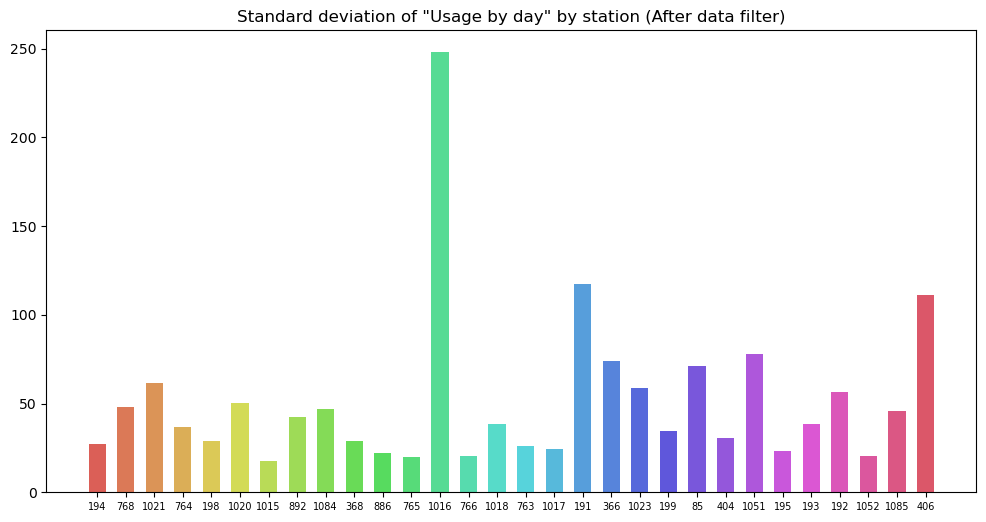

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(std_filtered_dict))
ax.bar(x, std_filtered_dict.values(), color=color_set(len(x)), width=0.6)
ax.set_xticks(x, std_filtered_dict.keys(), fontsize=7)
ax.set_title('Standard deviation of \"Usage by day\" by station (After data filter)')
fig.show()

/tmp/ipykernel_17940/3055652824.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


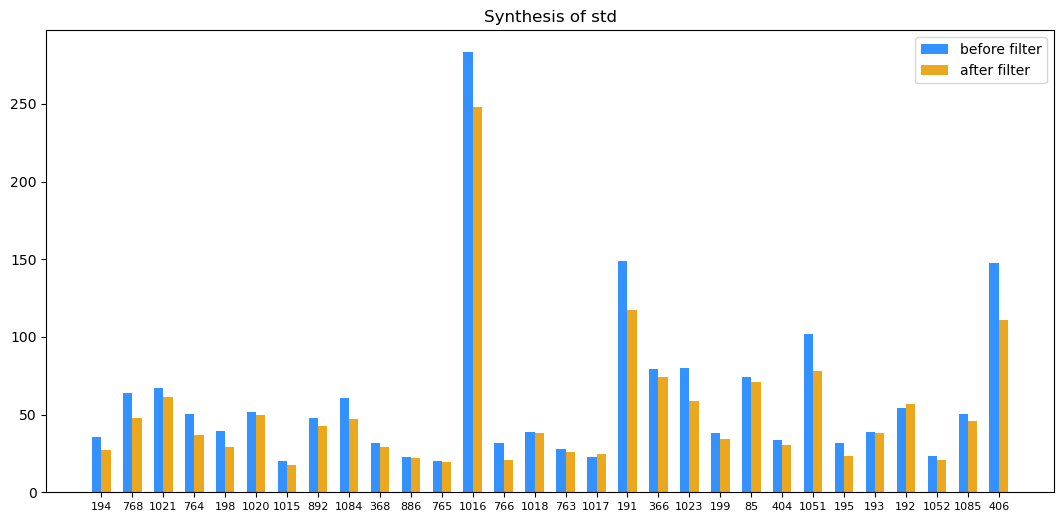

In [18]:
x = np.arange(len(std_filtered_dict))
fig, ax = plt.subplots(figsize=(13,6))
ax.bar(x-0.15, std_dict.values(), color='#3392ff', width=0.3, label='before filter')
ax.bar(x+0.15, std_filtered_dict.values(), color='#eba71e', width=0.3, label='after filter')
ax.set_xticks(x, std_filtered_dict.keys(), fontsize=8)
ax.legend()
ax.set_title('Synthesis of std')
fig.show()

/tmp/ipykernel_17940/3723941216.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


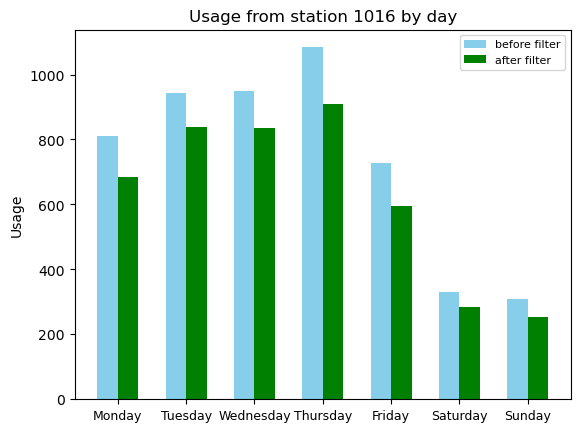

In [20]:
df = data_dict['1016']
usage_by_day = np.zeros(7)
x_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i, r in df.iterrows():
    usage_by_day[int(r['요일'])] += r['대여량']

fig, ax = plt.subplots(1, 1)

x = np.arange(len(usage_by_day))
ax.bar(x-0.15, usage_by_day, color='skyblue', width=0.3, label='before filter')
ax.set_xticks(x, x_labels, fontsize=9)
ax.set_ylabel('Usage')
# ax.set_title('Before Data filter', fontsize=20)
df_new = data_filtered_dict['1016']
usage_by_day_2 = np.zeros(7)
for i, r in df_new.iterrows():
    usage_by_day_2[int(r['요일'])] += r['대여량']
ax.bar(x+0.15, usage_by_day_2, color='g', width=0.3, label='after filter')
ax.legend(loc='upper right', fontsize=8)
ax.set_title('Usage from station 1016 by day')
fig.show()